## Dataset Information
Bike-sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, the user is able to easily rent a bike from a particular position and return back to another position. Currently, there are about over 500 bike-sharing programs around the world which are composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real-world applications of bike-sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns the bike-sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

### Dataset characteristics

#### Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

<li>instant: record index
<li>dteday : date
<li>season : season (1:winter, 2:spring, 3:summer, 4:fall)
<li>yr : year (0: 2011, 1:2012)
<li>mnth : month ( 1 to 12)
<li>hr : hour (0 to 23)
<li>holiday : weather day is holiday or not (extracted from [Web Link])
<li>weekday : day of the week
<li>workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
<li>weathersit :
<li>1: Clear, Few clouds, Partly cloudy, Partly cloudy
<li>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
<li>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
<li>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
<li>temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
<li>atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
<li>hum: Normalized humidity. The values are divided to 100 (max)
<li>windspeed: Normalized wind speed. The values are divided to 67 (max)
<li>casual: count of casual users
<li>registered: count of registered users
<li>cnt: count of total rental bikes including both casual and registered

### Associated tasks
Predication of bike rental count hourly or daily based on the environmental and seasonal settings.

# Import Modules

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import probplot, boxcox
from scipy.stats import probplot

# Loarding Date

In [88]:
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [89]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


# Data Information

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [91]:
df.shape

(17379, 17)

In [92]:
#Unique Values
df.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

# Preprocessing the dataset

In [93]:
df = df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})
df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### From the above set of 17 variables, we notice that the 7 of those columns ['season','year','month','hour','holiday','weekday','workingday','weather'] should be category data types. Converting these 7 features to categories

In [94]:
cols = ['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']
for col in cols:
    df[col] = df[col].astype('object')
    
df['dteday'] = pd.to_datetime(df['dteday'])

In [95]:
#Extracting day name from date
df['day'] = df['dteday'].dt.day_name()

In [96]:
#droping unnecessary columns.
df = df.drop(columns = ['instant', 'dteday'])

In [97]:
df.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
day           0
dtype: int64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   year        17379 non-null  object 
 2   month       17379 non-null  object 
 3   hour        17379 non-null  object 
 4   holiday     17379 non-null  object 
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  object 
 7   weather     17379 non-null  object 
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  humidity    17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  count       17379 non-null  int64  
 15  day         17379 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 2.1+ MB


In [99]:
# Distribution of data

In [100]:
#Distribution of numerical features
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Observation
<li>The dataset is complete with no missing values.
<li>All the weather-related features (temp, atemp, humidity, windspeed) are normalized.
<li>User counts (casual, registered, count) exhibit high variability, as evidenced by large standard deviations.
<li>Casual users are generally fewer compared to registered users.
<li>The total user count has a wide range, indicating varying levels of bike usag

In [101]:
#Distribution of categorical features
df.describe(include=['O'])

,season,year,month,hour,holiday,weekday,workingday,weather,day
count,17379,17379,17379,17379,17379,17379,17379,17379,17379
unique,4,2,12,24,2,7,2,4,7
top,3,1,5,17,0,6,1,1,Saturday
freq,4496,8734,1488,730,16879,2512,11865,11413,2512


## Summery

<table>
    <tr>
        <th>Column Name</th>
        <th>Format</th>
        <th>Range</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>season</td>
        <td>object</td>
        <td>1 to 4</td>
        <td>1:winter, 2:spring, 3:summer, 4:fall</td>
        <td></td>
    </tr>
    <tr>
        <td>year</td>
        <td>object</td>
        <td>0 and 1</td>
        <td>0: 2011, 1:2012</td>
        <td></td>
    </tr>
    <tr>
        <td>month</td>
        <td>object</td>
        <td>1 to 12</td>
        <td></td>
    </tr>
    <tr>
        <td>hour</td>
        <td>object</td>
        <td>0 to 23</td>
        <td></td>
    </tr>
    <tr>
        <td>holiday</td>
        <td>object</td>
        <td>0 and 1</td>
        <td>1 = Holiday, 0 = Not a Holiday</td>
    </tr>
    <tr>
        <td>weekday</td>
        <td>object</td>
        <td> 1 to 6</td>
        <td>day of the week</td>
        <td></td>
    </tr>
    <tr>
        <td>workingday</td>
        <td>object</td>
        <td>0 and 1</td>
        <td>1 = Neither a weekend nor holiday, 0 = Either a weekend or a holiday</td>
    </tr>
    <tr>
        <td>weather</td>
        <td>object</td>
        <td>1 to 4</td>
        <td>1 = Clear, Few clouds, Partly cloudy, Partly cloudy<br>2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog</td>
    </tr>
    <tr>
        <td>temp</td>
        <td>float64</td>
        <td>0.2 to 1</td>
        <td> Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)</td>
    </tr>
    <tr>
        <td>atemp</td>
        <td>float64</td>
        <td>0 to 1</td>
        <td>Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)</td>
    </tr>
    <tr>
        <td>humidity</td>
        <td>float64</td>
        <td>0 to 1</td>
        <td>Normalized humidity. The values are divided to 100 (max)</td>
    </tr>
    <tr>
        <td>windspeed</td>
        <td>float64</td>
        <td>0 to 0.85</td>
        <td>Normalized wind speed. The values are divided to 67 (max)</td>
    </tr>
    <tr>
        <td>casual</td>
        <td>int64</td>
        <td>0 to 367</td>
        <td>Number of non-registered user rentals initiated</td>
    </tr>
    <tr>
        <td>registered</td>
        <td>int64</td>
        <td>0 to 886</td>
        <td>Number of registered user rentals initiated</td>
    </tr>
    <tr>
        <td>count</td>
        <td>int64</td>
        <td>1 to 977</td>
        <td>Number of total rentals (casual + registered)</td>
    </tr>
    <tr>
        <td>day</td>
        <td>object</td>
        <td> </td>
        <td>day of the week</td>
        <td></td>
    </tr>
</table>


# Exploratory Data Analysis
### Univariate analysis

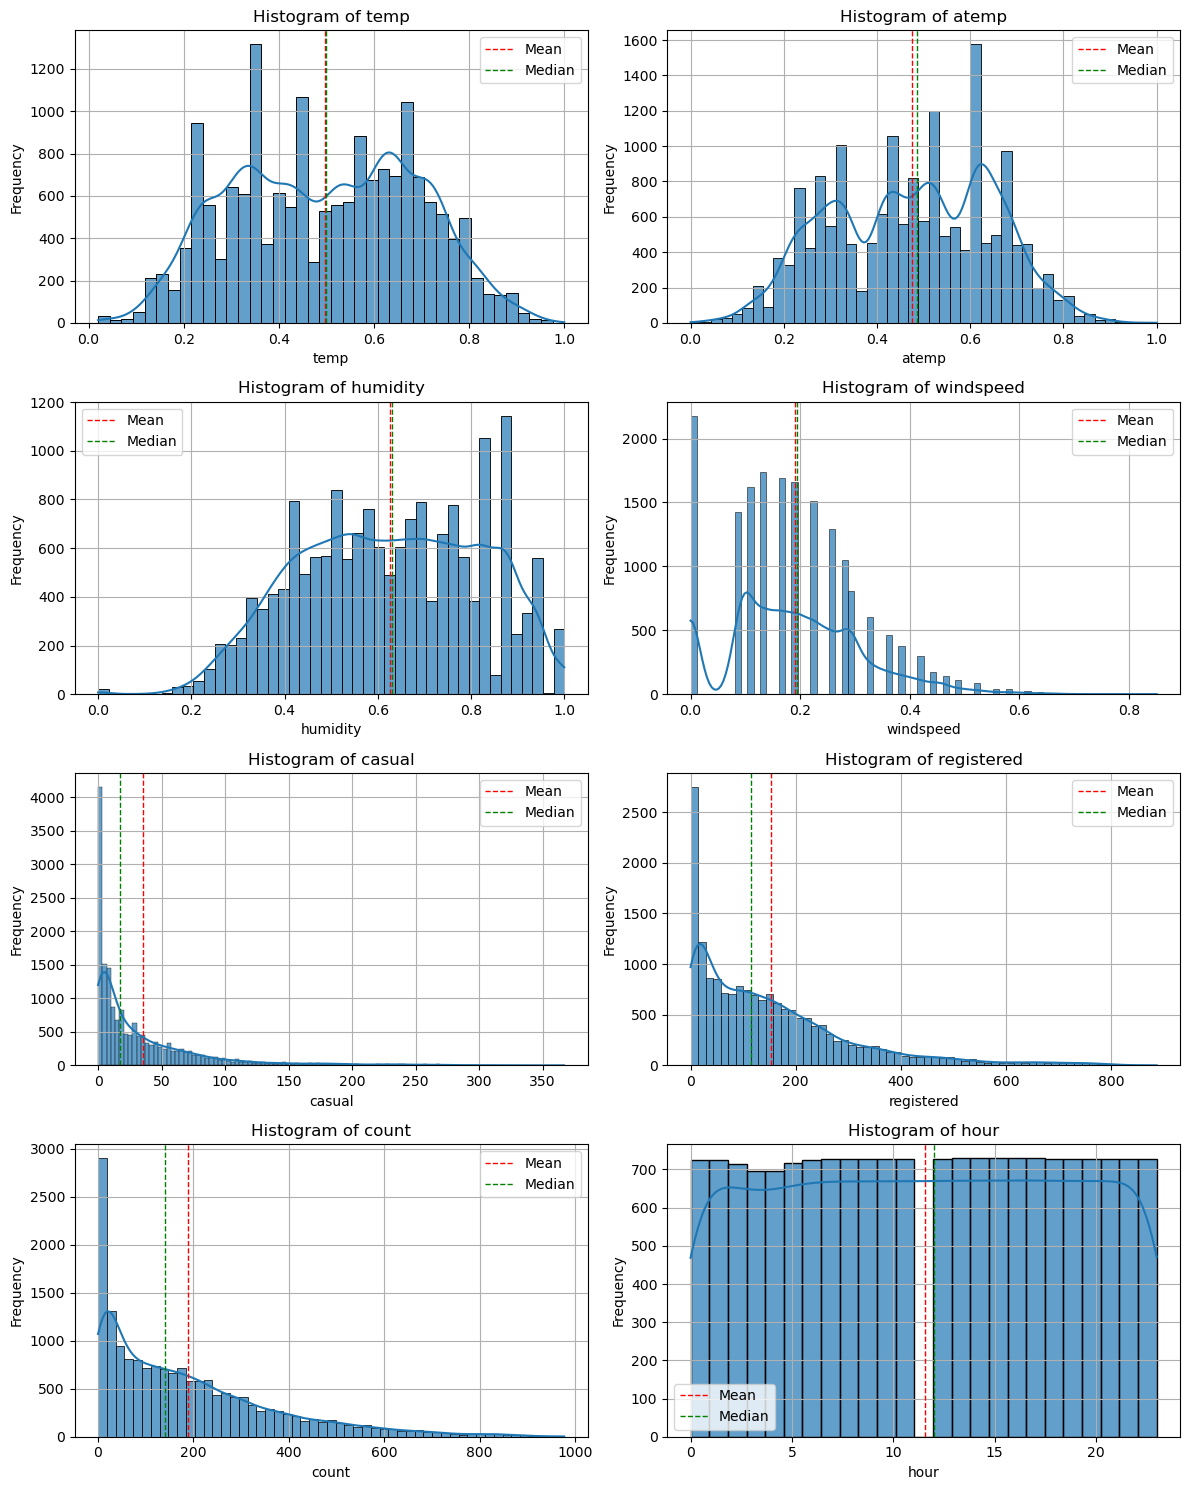

In [102]:
plt.figure(figsize=(12, 15))
for i, col in enumerate(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count', 'hour'],):
    plt.subplot(4, 2, i + 1) 
    sns.histplot(df[col], kde=True, edgecolor='black', alpha=0.7)
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.legend()
    plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#### Observation
<li> 'atemp' is skewed to the right, meaning that most of the values are clustered towards the lower end of the distribution, with a smaller number of values trailing off towards the higher end, the distribution is relatively symmetric around the median.
<li> The "temp" variable shows two distinct peaks, indicating two main groups within the data
<li>'hour' The data is skewed to the left, meaning that there are more observations at earlier hours of the day. The mean and median are both around 12, indicating that the distribution is not too skewed
<li>The "humidity" variable shows a unimodal distribution with a single, broad peak, the relative symmetry around the median suggests a balanced distribution of "humidity" values in the dataset
<li>The "windspeed" variable shows a right-skewed (positively skewed) distribution with a single major peak and a long tail extending to the right.

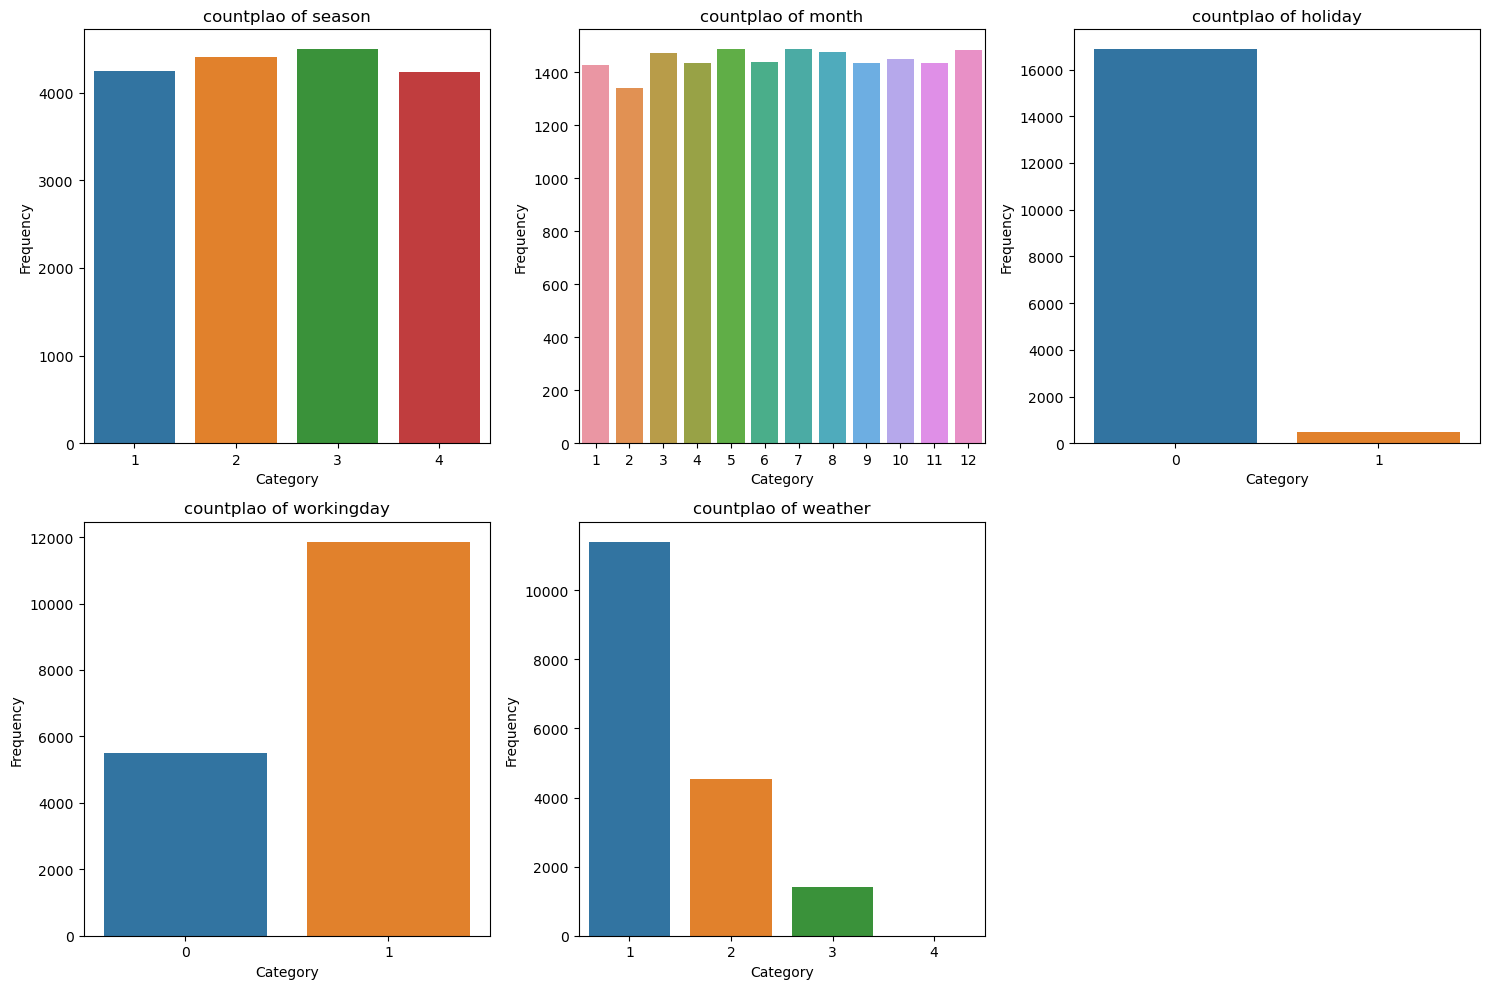

In [103]:
#catrgorical columns
cols = ['season', 'month', 'holiday', 'workingday', 'weather']
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    plt.subplot( 2, 3, i + 1)  # Create a subplot for each categorical column
    sns.countplot(data=df, x=col)
    plt.title(f'countplao of {col}')
    plt.xlabel('Category')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Observation
<li>In order to understand the distribution for each feature, I plotted histplot along with its mean and median
<li>Temp, atemp and humidity are not normal, the data is uneven in the middle with noticeable fluctuations
<li>Windspeed has no skew
<li>Casual, registered, and count are right-skewed. 

### Bivariate Analysis
#### Count vs Categorical columns

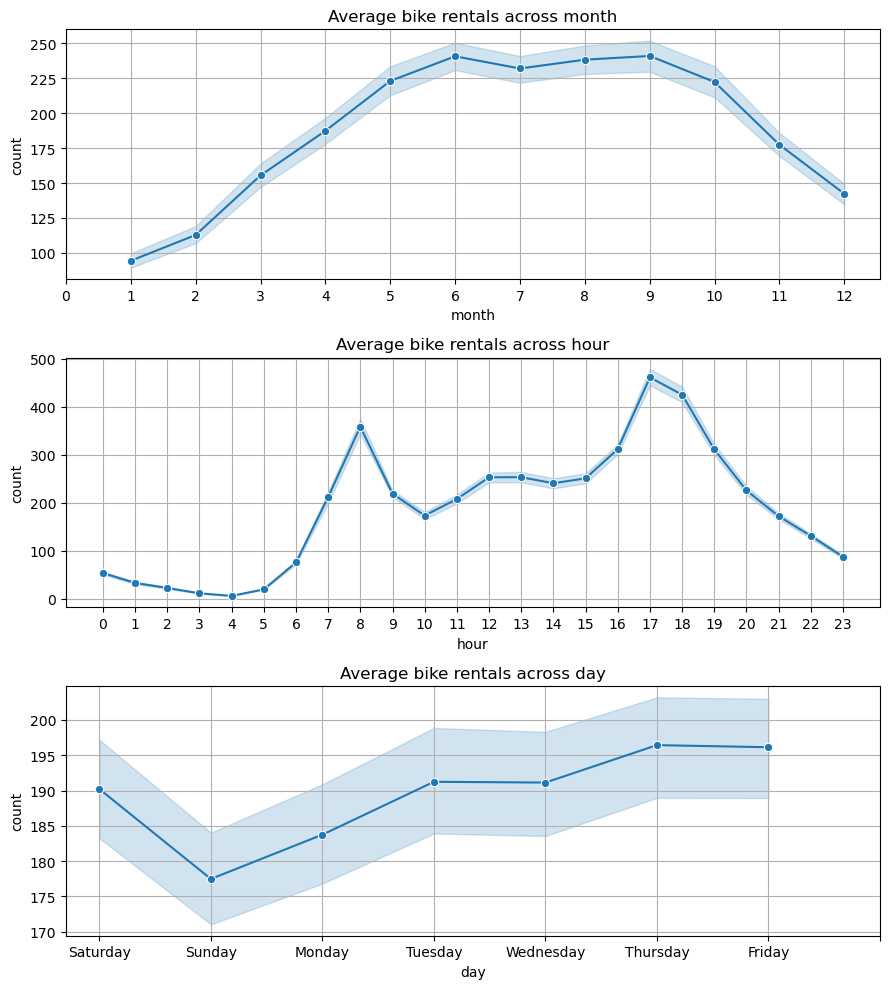

In [104]:
fig, axes = plt.subplots(3,1, figsize = (9, 10))

sns.lineplot(x='month', y='count', data=df, marker='o', ax=axes[0])
axes[0].set_title('Average bike rentals across month')
axes[0].set_xticks(range(13))
axes[0].grid(True)

sns.lineplot(x='hour', y='count', data=df, marker='o', ax=axes[1])
axes[1].set_title('Average bike rentals across hour')
axes[1].set_xticks(range(24))
axes[1].grid(True)

sns.lineplot(x='day', y='count', data=df, marker='o', ax=axes[2])
axes[2].set_title('Average bike rentals across day')
axes[2].set_xticks(range(8))
axes[2].grid(True)

plt.tight_layout()

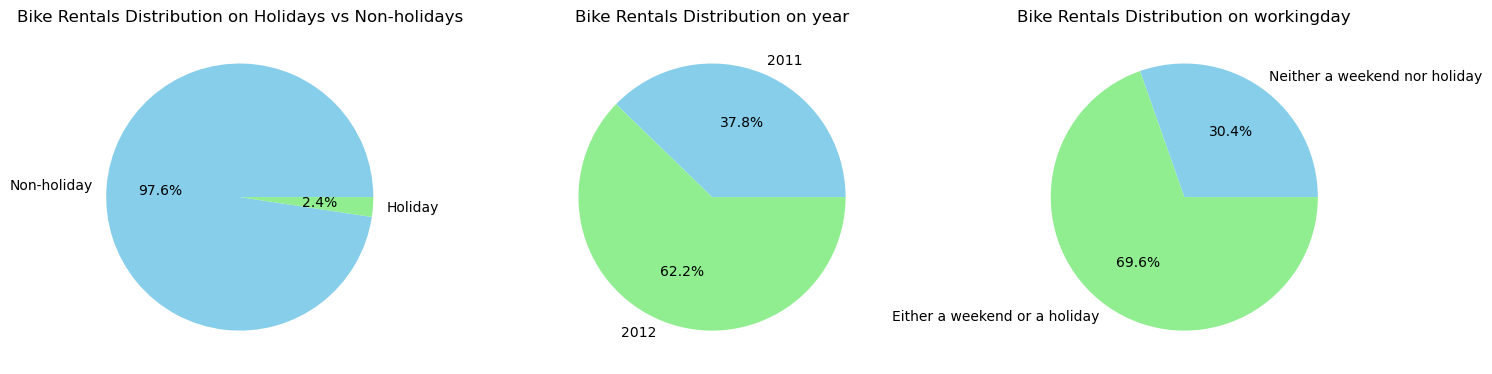

In [105]:
count_by_holiday = df.groupby('holiday')['count'].sum()
count_by_year = df.groupby('year')['count'].sum()
count_by_workingday = df.groupby('workingday')['count'].sum()
fig, axes = plt.subplots(1, 3, figsize = (15, 15))

axes[0].pie(count_by_holiday, labels=['Non-holiday', 'Holiday'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
axes[0].set_title('Bike Rentals Distribution on Holidays vs Non-holidays')


axes[1].pie(count_by_year, labels=['2011', '2012'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
axes[1].set_title('Bike Rentals Distribution on year')


axes[2].pie(count_by_workingday, labels=['Neither a weekend nor holiday',  'Either a weekend or a holiday'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen']) 
axes[2].set_title('Bike Rentals Distribution on workingday')


plt.tight_layout()

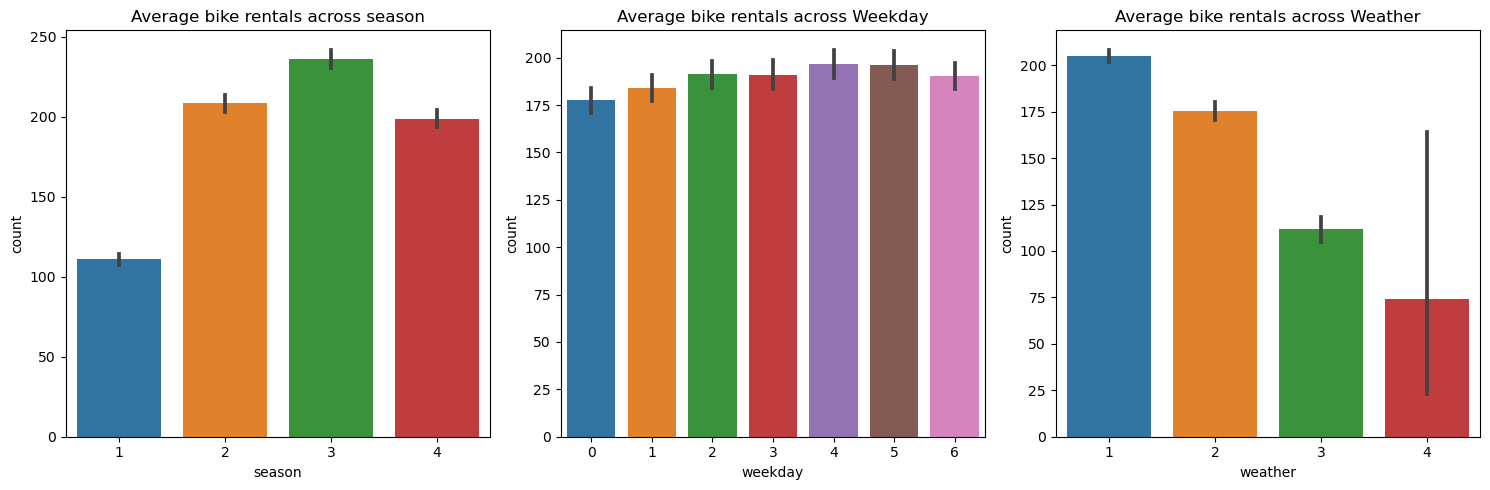

In [106]:
fig, axes = plt.subplots(1,3, figsize = (15, 5))

sns.barplot(x='season', y='count', data=df, ax = axes[0])
axes[0].set_title('Average bike rentals across season')

sns.barplot(x='weekday', y='count', data=df, ax = axes[1])
axes[1].set_title('Average bike rentals across Weekday')

sns.barplot(x='weather', y='count', data=df, ax = axes[2])
axes[2].set_title('Average bike rentals across Weather')

plt.tight_layout()

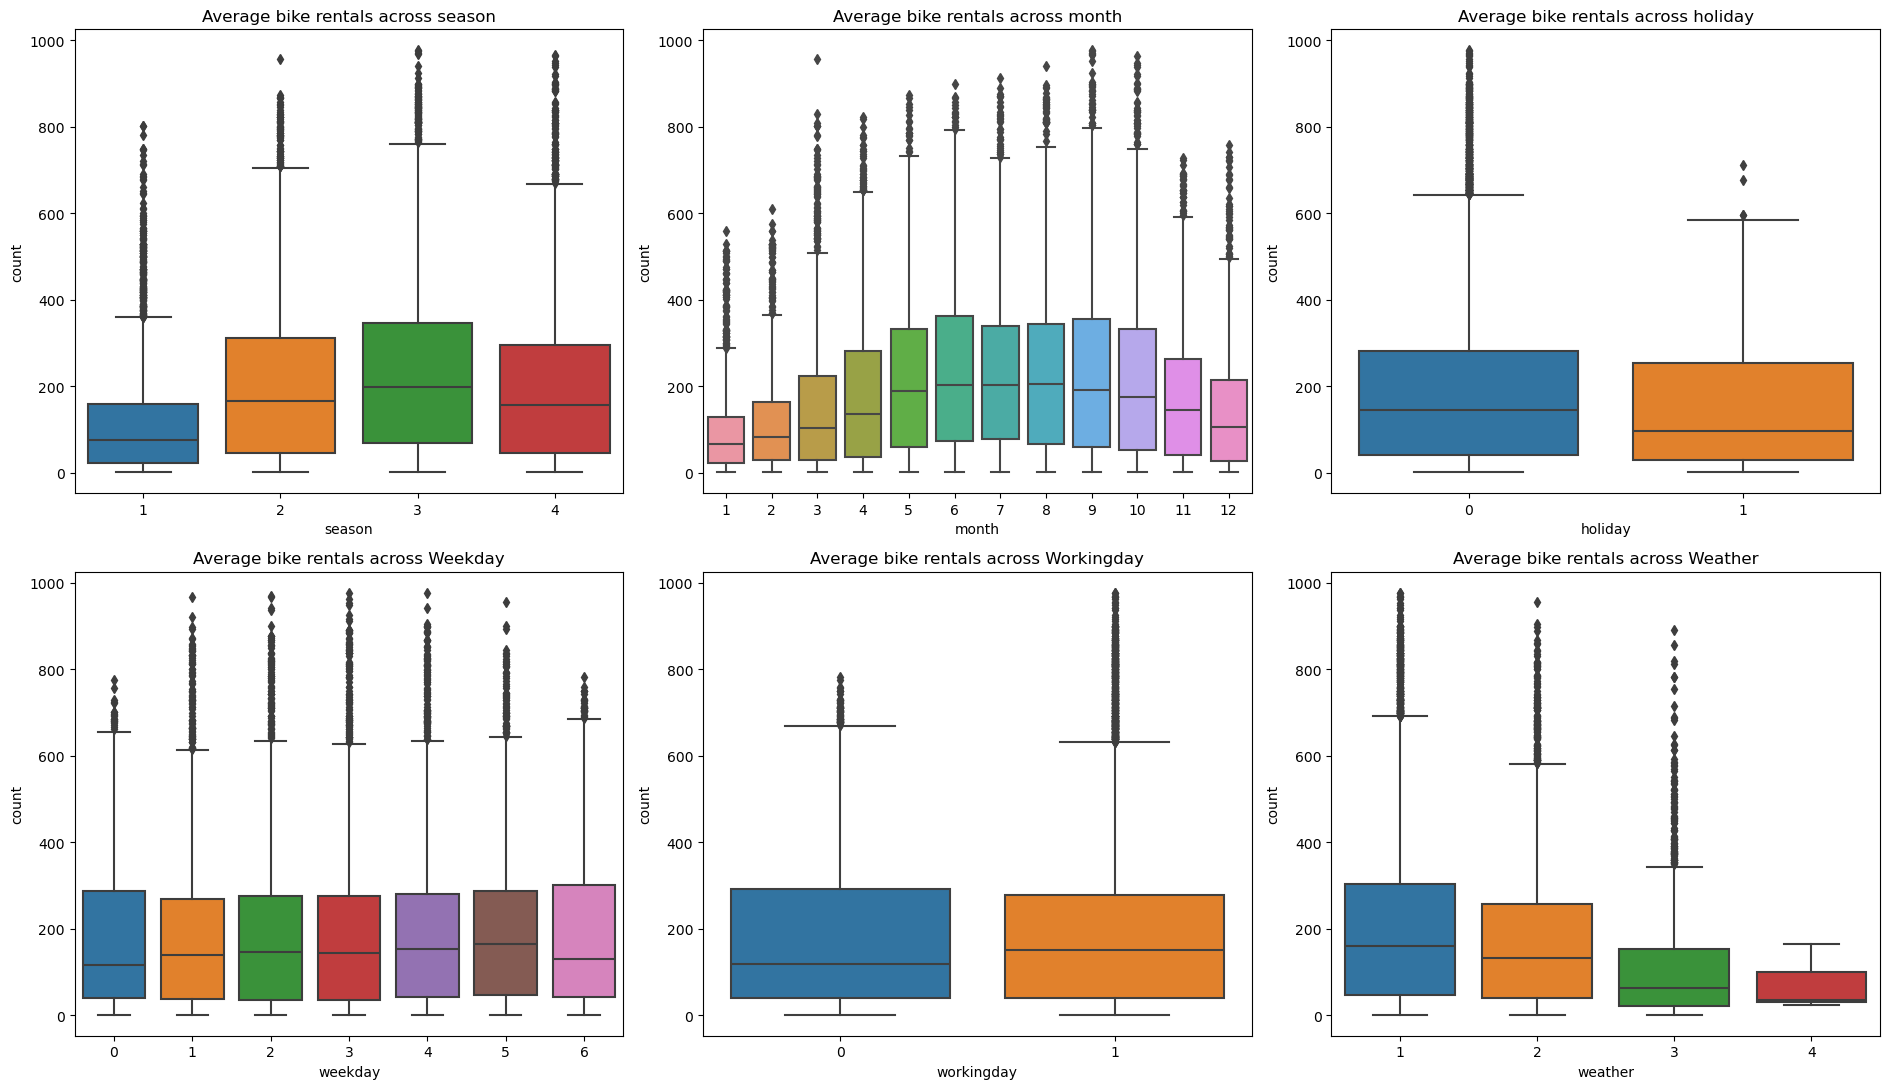

In [107]:
fig, axes = plt.subplots(2, 3, figsize = (19, 11))

sns.boxplot(x='season', y='count', data=df, ax = axes[0,0])
axes[0,0].set_title('Average bike rentals across season')

sns.boxplot(x='month', y='count', data=df, ax = axes[0,1])
axes[0,1].set_title('Average bike rentals across month')

sns.boxplot(x='holiday', y='count', data=df, ax = axes[0,2])
axes[0,2].set_title('Average bike rentals across holiday')

sns.boxplot(x='weekday', y='count', data=df, ax = axes[1,0])
axes[1,0].set_title('Average bike rentals across Weekday')

sns.boxplot(x='workingday', y='count', data=df, ax = axes[1,1])
axes[1,1].set_title('Average bike rentals across Workingday')

sns.boxplot(x='weather', y='count', data=df, ax = axes[1,2])
axes[1,2].set_title('Average bike rentals across Weather')

plt.tight_layout()

### Observation
<li>Demand for bike is more during 8-10 in morning and 18-20 in night.
<li>Bike demand from midnight start decreasing till 4 in morning then gradually increase and comes at peak in night.
<li>There is a increase in demand from monday to tuesday and remain same on wednesday and then increase on thursday and remain same on friday, later increases on satuerday and shows least demand in sunday.
<li>The bike count is higher in spring (2) and summer (3).
<li>Bike count increase from January till June then there is a small decrease and again rise in October and gradually decrease till December.
<li>97% of bikes are rented when there is no holiday and 3% on holiday.
<li>Bike counts are higher on non-holidays.
<li>Most bike users prefer weather types 1 (Clear, Few clouds, Partly cloudy, Partly cloudy) and 2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist), and least prefer type 4 (Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog).
<li>There is a spike in bike usage at 8-10 AM (possibly due to office hours), followed by a very tall spike at 18-20 PM (when office hours are over).
<li>Few rented bike count are above the maximum point.

## Scatter Plot

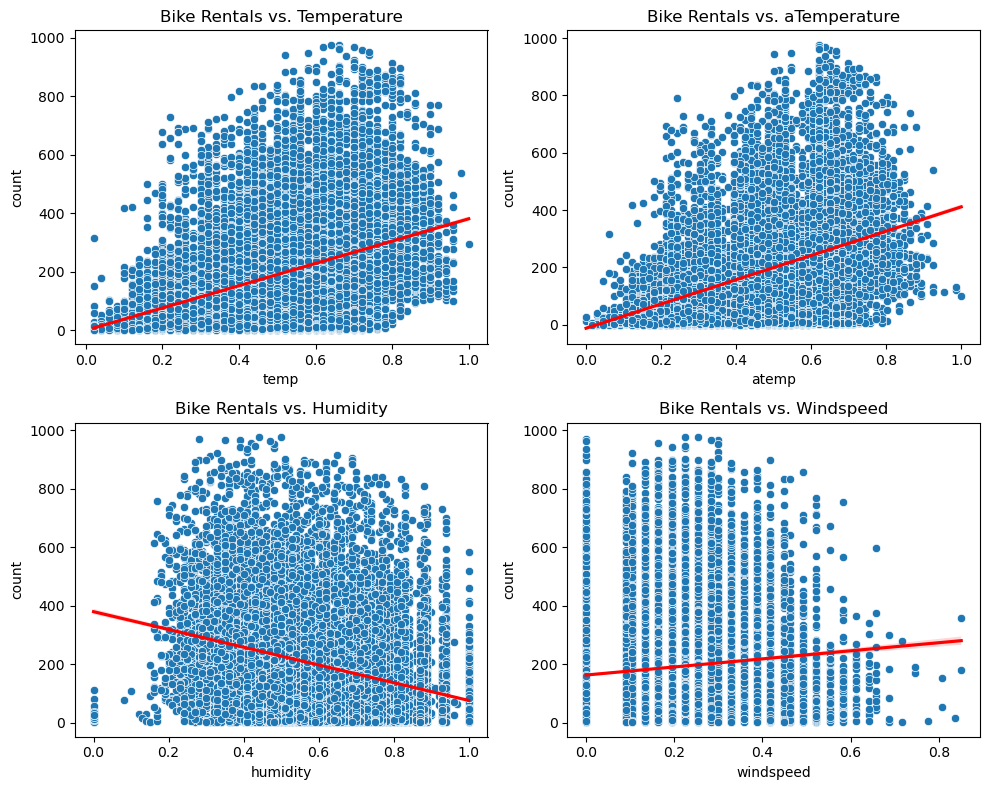

In [108]:
fig, axes  = plt.subplots(2,2 ,figsize=(10,8))

sns.scatterplot(x='temp', y='count', data=df, ax = axes[0,0])
sns.regplot(x='temp', y='count', data=df, scatter=False, color='red', ax = axes[0,0])
ax = axes[0,0].set_title('Bike Rentals vs. Temperature')

sns.scatterplot(x='atemp', y='count', data=df, ax = axes[0,1])
sns.regplot(x='atemp', y='count', data=df, scatter=False, color='red', ax = axes[0,1])
ax = axes[0,1].set_title('Bike Rentals vs. aTemperature')

sns.scatterplot(x='humidity', y='count', data=df, ax = axes[1,0])
sns.regplot(x='humidity', y='count', data=df, scatter=False, color='red', ax = axes[1,0])
ax = axes[1,0].set_title('Bike Rentals vs. Humidity')

sns.scatterplot(x='windspeed', y='count', data=df, ax = axes[1,1])
sns.regplot(x='windspeed', y='count', data=df, scatter=False, color='red', ax = axes[1,1])
ax = axes[1,1].set_title('Bike Rentals vs. Windspeed')
plt.tight_layout()

### Observation
<li>There is a positive correlation between both temp and atemp for most of the temperature range, and a linear fit isn’t far from the best-fit curve. 
<li>This should intuitively make sense, as people are not likely to bike outside in cold weather. 
<li>For the maximum temperatures, which seem to be a small subset of the data, there is a dip in this curve. Once again, this should make sense as users may also be discouraged to bike when it’s too hot outside.
<li>There seems to be a negative correlation between the humidity and count, with a linear fit being very close to the best curve fit for all of the data (excluding some outliers with very low humidity)
<li>Looking at the windspeed data, however, doesn’t give us a clear interpretation of how it affects usage. The correlation between the two factors is weak at best

## Multivariate analysis

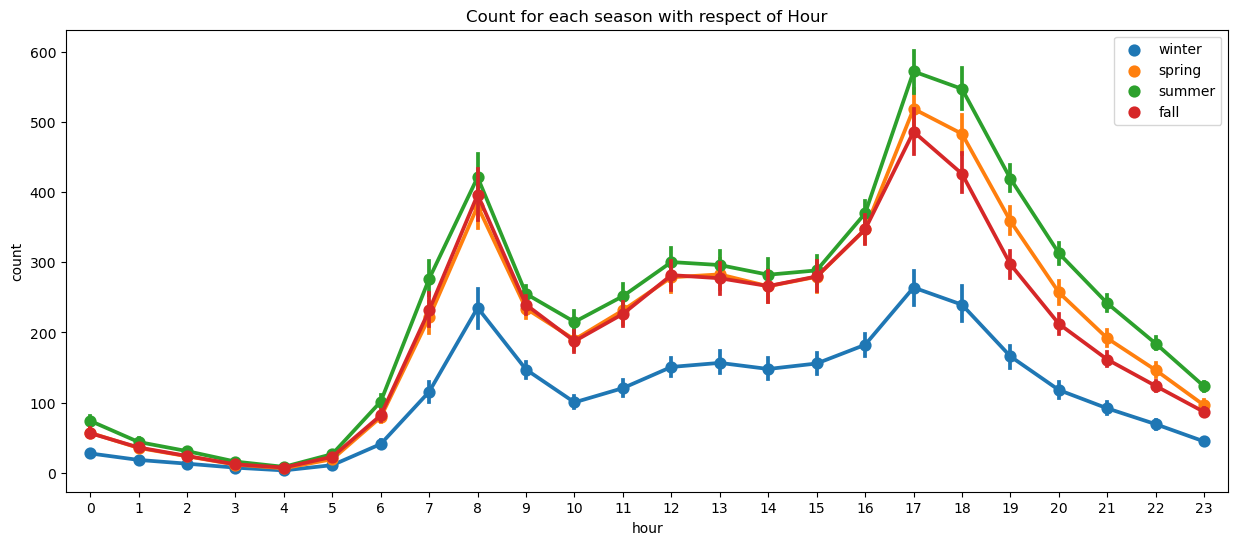

In [109]:
fig, ax = plt.subplots(figsize=(15,6))
sns.pointplot(data = df, x = 'hour', y = 'count', hue = 'season', ax=ax)
plt.title('Count for each season with respect of Hour')
handles, _ = ax.get_legend_handles_labels()  # Get legend handles and labels
plt.legend(handles, ['winter', 'spring', 'summer', 'fall'])

Text(0.5, 1.0, 'Count for each month with respect of Hour')

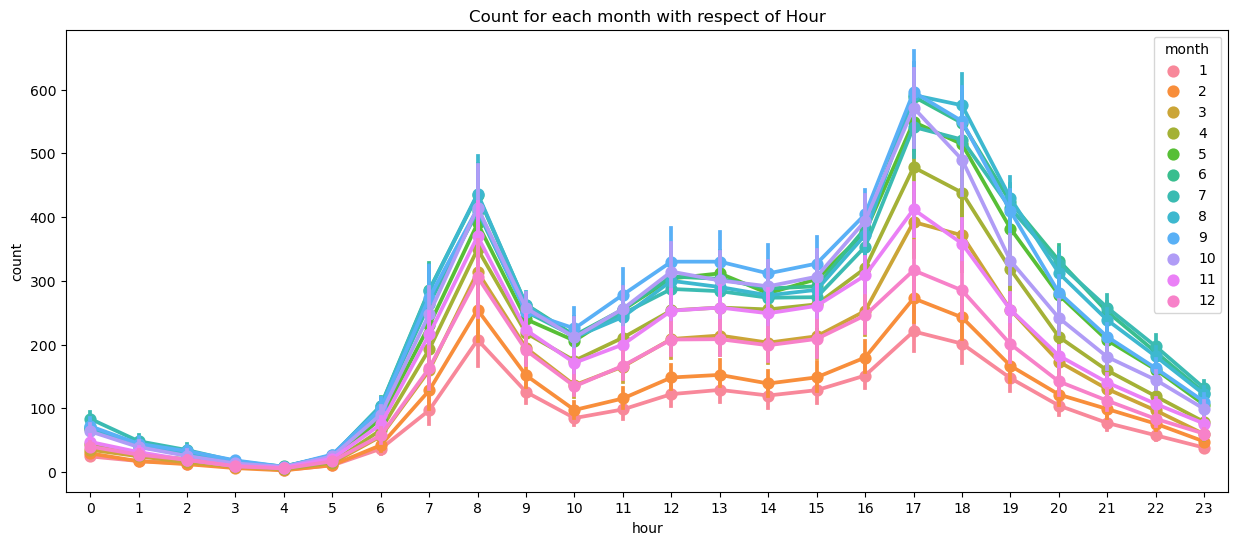

In [110]:
fig, ax = plt.subplots(figsize=(15,6))
sns.pointplot(data = df, x = 'hour', y = 'count', hue = 'month', ax=ax)
plt.title('Count for each month with respect of Hour')

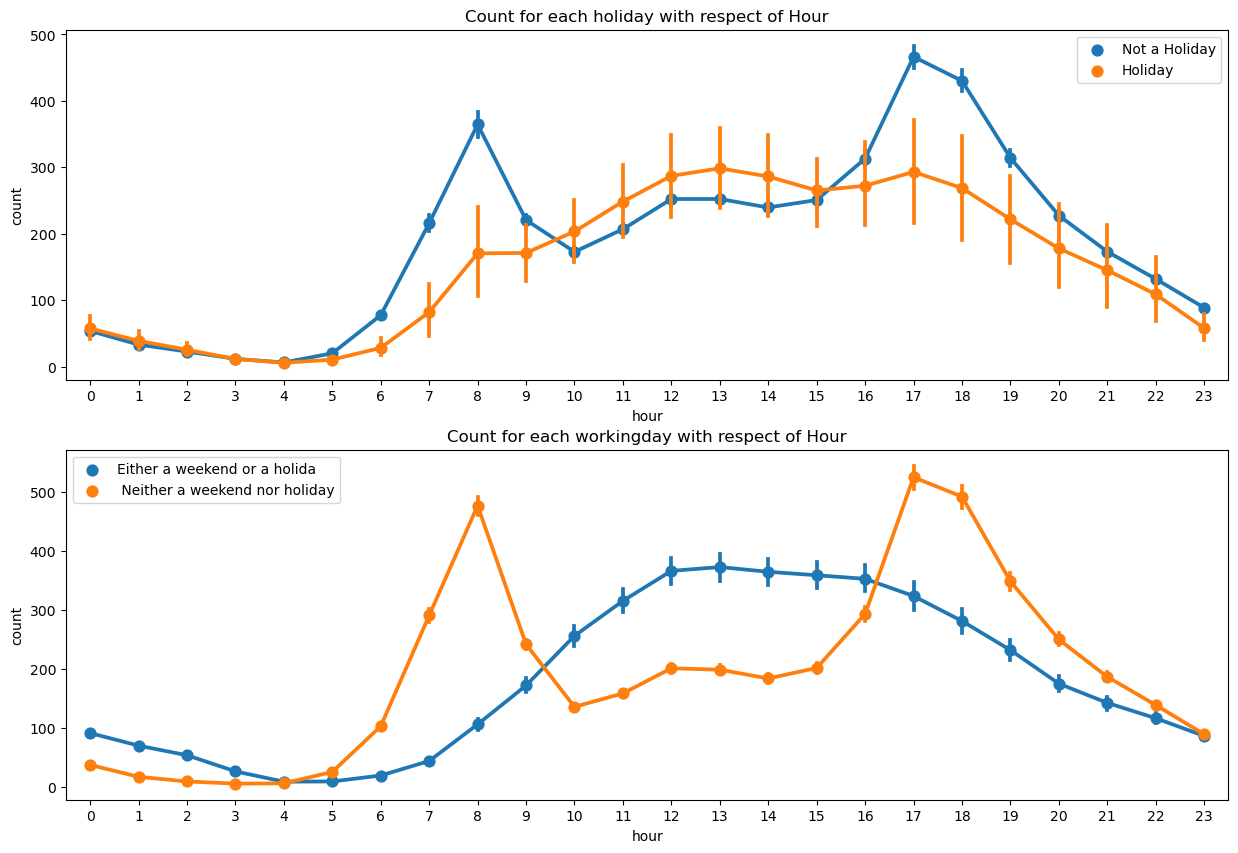

In [111]:
fig, axes = plt.subplots(2,1,figsize=(15,10))

sns.pointplot(data = df, x = 'hour', y = 'count', hue = 'holiday', ax=axes[0])
axes[0].set_title('Count for each holiday with respect of Hour')
handles, _ = axes[0].get_legend_handles_labels()  # Get legend handles and labels
axes[0].legend(handles, ['Not a Holiday', 'Holiday'])

sns.pointplot(data = df, x = 'hour', y = 'count', hue = 'workingday', ax=axes[1])
axes[1].set_title('Count for each workingday with respect of Hour')
handles, _ = axes[1].get_legend_handles_labels()  # Get legend handles and labels
axes[1].legend(handles, ['Either a weekend or a holida', ' Neither a weekend nor holiday'])

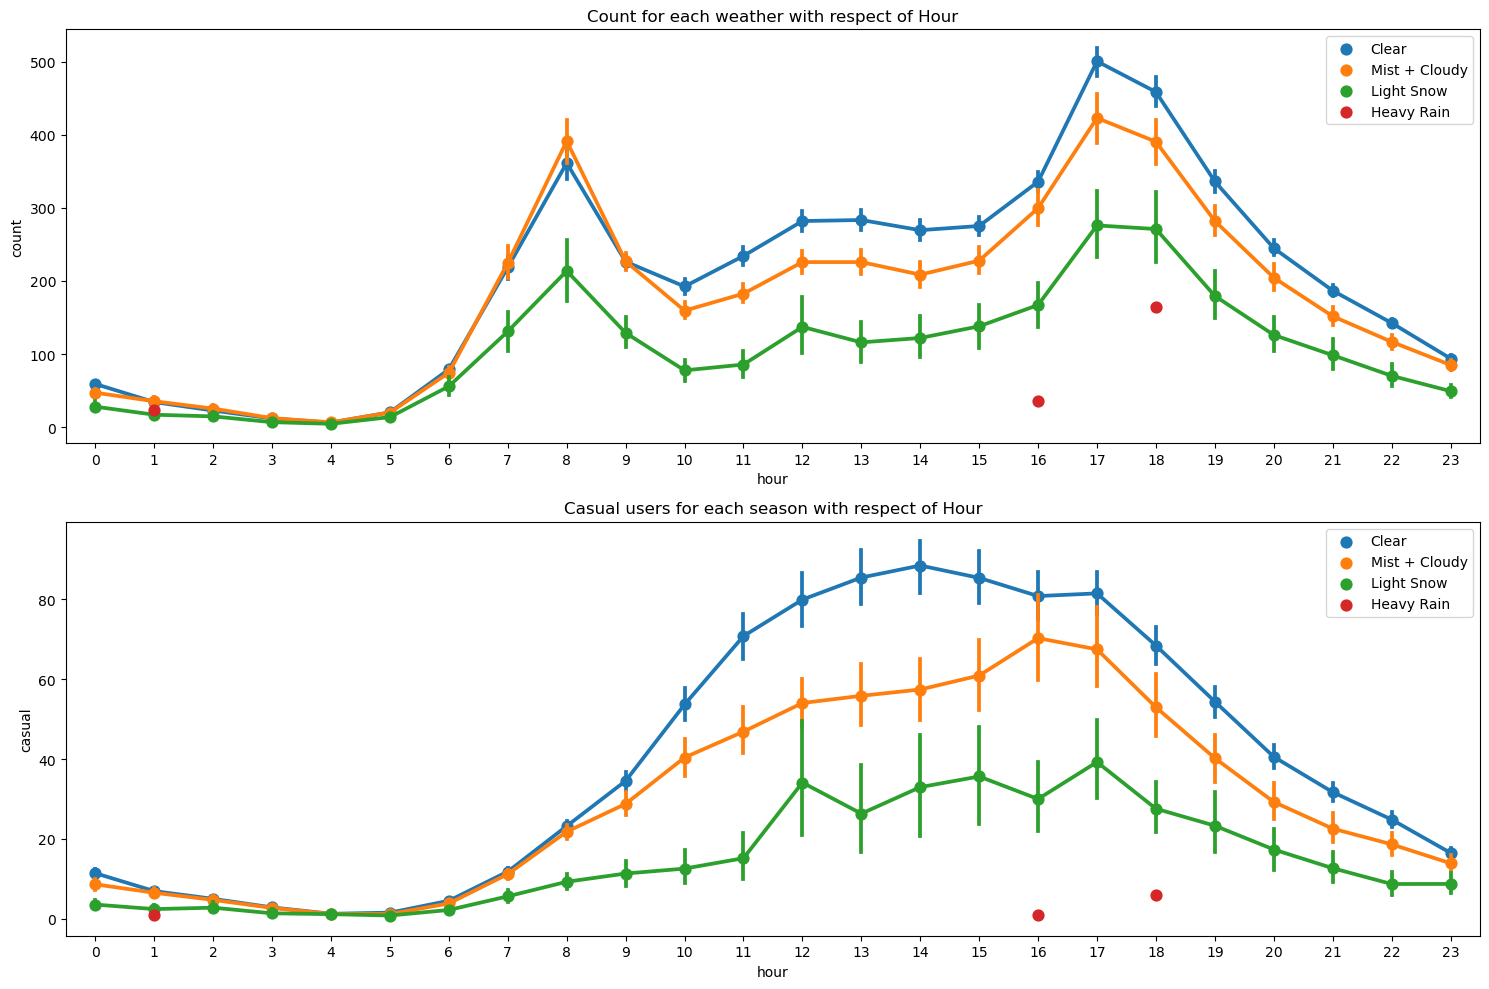

In [112]:
fig, axes = plt.subplots(2, 1,figsize=(15,10))

sns.pointplot(data = df, x = 'hour', y = 'count', hue = 'weather', ax=axes[0])
axes[0].set_title('Count for each weather with respect of Hour')
handles, _ = axes[0].get_legend_handles_labels()  # Get legend handles and labels
axes[0].legend(handles, ['Clear', 'Mist + Cloudy', 'Light Snow', 'Heavy Rain'])

sns.pointplot(data = df, x = 'hour', y = 'casual', hue = 'weather', ax=axes[1])
axes[1].set_title('Casual users for each season with respect of Hour')
handles, _ = axes[1].get_legend_handles_labels()  # Get legend handles and labels
axes[1].legend(handles, ['Clear', 'Mist + Cloudy', 'Light Snow', 'Heavy Rain'])

plt.tight_layout()

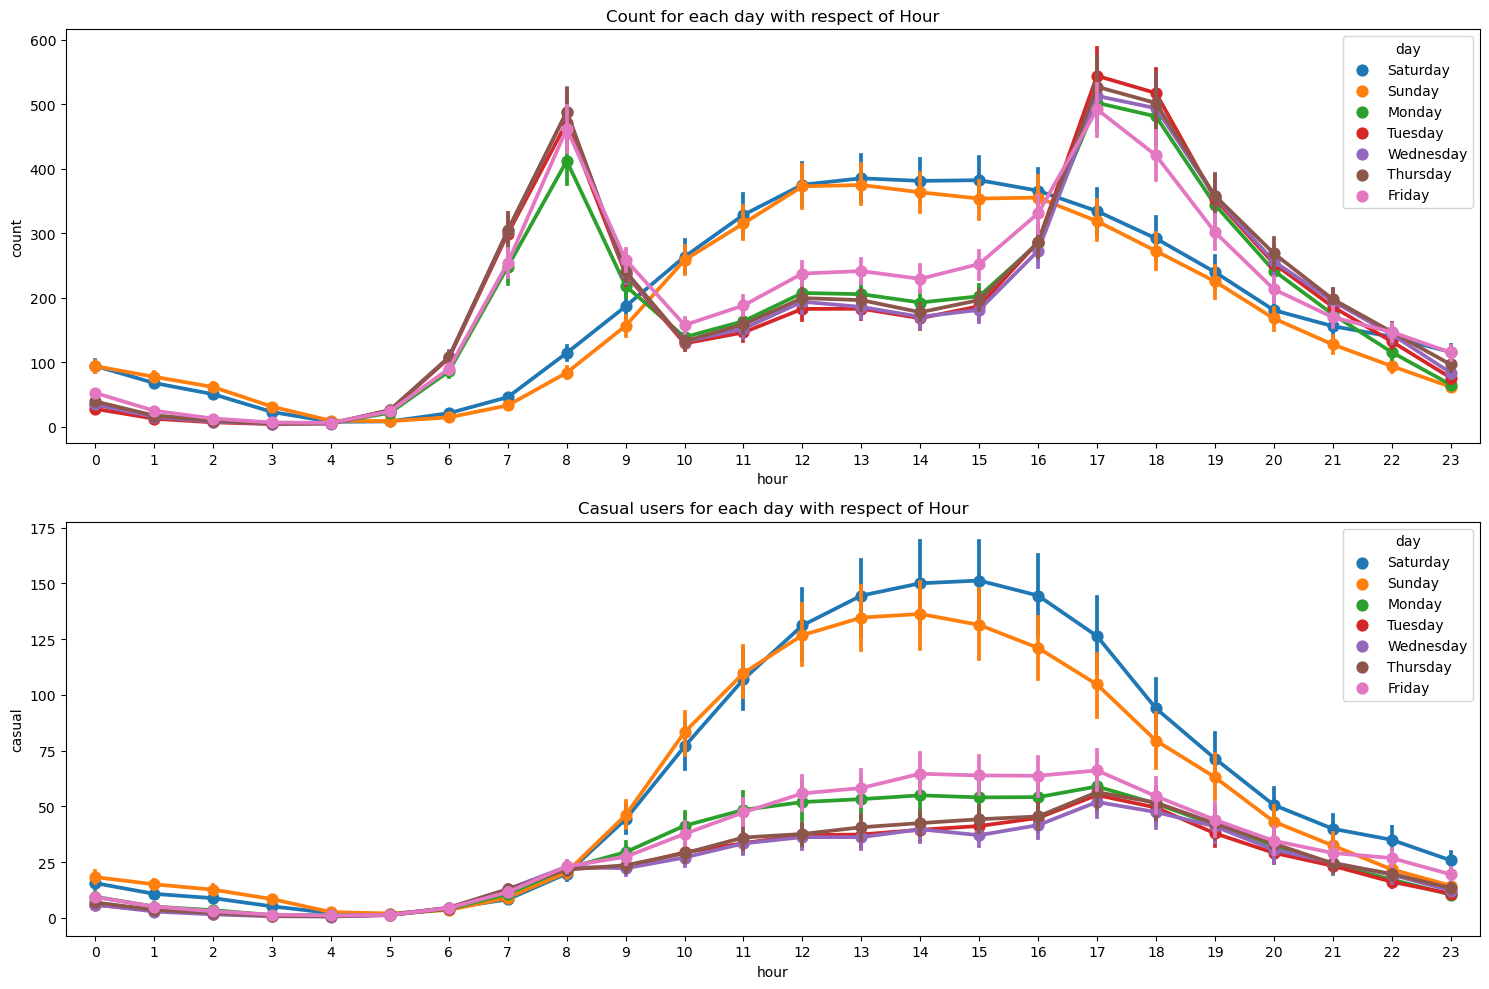

In [113]:
fig, axes = plt.subplots(2, 1,figsize=(15,10))

sns.pointplot(data = df, x = 'hour', y = 'count', hue = 'day', ax=axes[0])
axes[0].set_title('Count for each day with respect of Hour')

sns.pointplot(data = df, x = 'hour', y = 'casual', hue = 'day', ax=axes[1])
axes[1].set_title('Casual users for each day with respect of Hour')

plt.tight_layout()

#### Observation
<li>Bike demand peaks around 8 AM and 5 PM on working days.
<li>During spring, summer, and fall, bike usage is high, but it decreases in winter. Monthly bike usage is consistently high during office hours.
<li>We observe more bike rentals in the fall (July to September) and summer (April to June).
<li>On holidays, bike rentals peak around 8 AM and 5 PM, similar to normal days, but overall usage decreases.
<li>During holidays, there is a peak between 10 AM and 4 PM, and on weekends, rentals are uniform across the day with a peak around noon, higher than on working days.
<li>Most bike users prefer clean, slightly cloudy, and light snow conditions, while there are no users during heavy rain or snow. <li>Registered users and the count of users are the same during office hours, but casual users peak between 7 AM and 4 PM, with a higher peak at noon.
<li>On working days, bike usage is consistent during office hours.
<li>On weekends, there is a high peak at noon, with casual users preferring bikes from 9 AM to 4 PM.
<li>Registered users mainly use bikes on working days, while casual users prefer weekends or holidays.

# Correlation Heatmap

In [114]:
cols = ['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']
for col in cols:
    df[col] = df[col].astype('int64')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   year        17379 non-null  int64  
 2   month       17379 non-null  int64  
 3   hour        17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weather     17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  humidity    17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  count       17379 non-null  int64  
 15  day         17379 non-null  object 
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


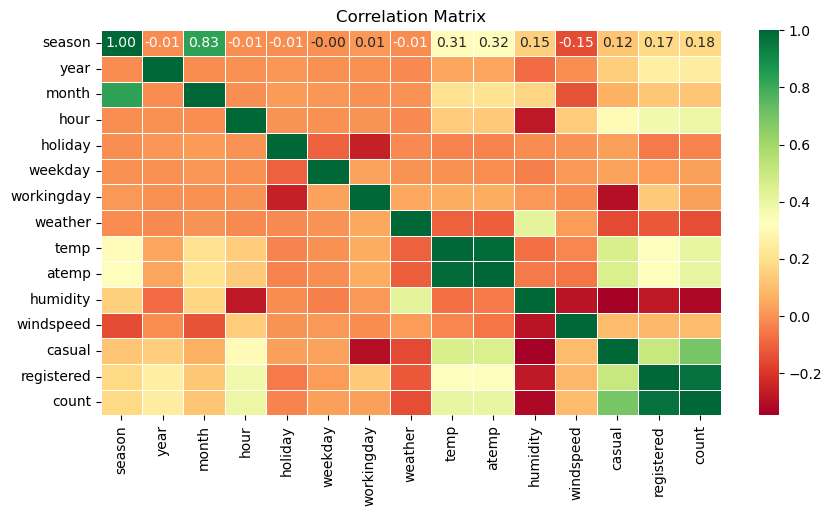

In [117]:
numeric_cols = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<li>Values greater than 0.1 or less than -0.1 are retained, indicating meaningful relationships.
<li>Values between -0.1 and 0.1 are set to NaN, filtering out less significant correlations for a cleaner view.

In [119]:
correlation_matrix[(correlation_matrix > 0.05) | (correlation_matrix < -0.05)]

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,NaN,0.830386,NaN,NaN,NaN,NaN,NaN,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
year,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.083546,NaN,0.142779,0.253684,0.250495
month,0.830386,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hour,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,NaN,NaN,NaN,NaN,1.000000,-0.102088,-0.252471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,NaN,NaN,NaN,NaN,-0.102088,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,NaN,NaN,NaN,NaN,-0.252471,NaN,1.000000,NaN,0.055390,0.054667,NaN,NaN,-0.300942,0.134326,NaN
weather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.102640,-0.105563,0.418130,NaN,-0.152628,-0.120966,-0.142426
temp,0.312025,NaN,0.201691,0.137603,NaN,NaN,0.055390,-0.102640,1.000000,0.987672,-0.069881,NaN,0.459616,0.335361,0.404772
atemp,0.319380,NaN,0.208096,0.133750,NaN,NaN,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929


#### Observation
##### 1. Significant Positive Correlations:
<li>Strong positive correlation between season and month (0.83), indicating that specific seasons correspond to particular months.
<li>temp and atemp (0.988): Strong positive correlation.
<li>registered and count (0.972): Very strong positive correlation, showing that the number of registered users is the major component of the total count of bike rentals.
<li>month and season (0.83): Strong positive correlation.</li> 

##### 2.Moderate Positive Correlations:
<li>casual and count (0.695): Moderate to strong positive correlation.
<li>hour and count (0.394): Suggesting that the hour of the day affects the number of rentals, likely reflecting commute times.
<li>casual and temp (0.460): Indicating that warmer temperatures lead to more casual bike rentals.
<li>registered and temp (0.335): Weak to moderate positive correlation, suggesting that registered users are somewhat influenced by temperature.
<li>hour and registered (0.374): Moderate positive correlation, showing that registered users have specific times when they are more active.</li>

##### 3. Negative Correlations:
<li>humidity and count (-0.323): Moderate negative correlation, indicating that higher humidity tends to decrease bike rentals.
<li>humidity and casual (-0.347):suggesting that casual users are less likely to rent bikes in high humidity.
<li>humidity and registered (-0.274): Weak to moderate negative correlation, showing that registered users also rent less in high humidity.</li>

##### 4. Weak or No Correlations:
<li>windspeed and other variables: Windspeed shows very weak correlations with other variables, suggesting it has minimal impact on bike rentals.
<li>holiday and other variables: Holiday status shows no significant correlation with other variables, indicating bike rentals are not heavily influenced by holidays in this dataset.
<li>weekday and other variables: Similarly, the day of the week shows no significant correlations, indicating a relatively uniform distribution of rentals across weekdays.</li>   


##### Summary
<li>The correlation matrix provides insight into how different features in the dataset relate to one another:
<li>Temperature (temp, atemp) has a significant positive impact on bike rentals, especially for casual users.
<li>Humidity has a negative impact on bike rentals, with higher humidity reducing the number of rentals.
<li>Time of day (hour) is an important factor, with notable increases in rentals during certain hours, reflecting daily commute patterns.
<li>Registered users form a major part of the total rentals, as indicated by their strong correlation with the total count.

# Hypothesis Testing
#### Based on your chart experiments, define three hypothetical statements from the dataset. We perform hypothesis testing to obtain conclusion 

### Statement :
<li>Null Hypothesis (H0):There is no significant difference in the mean number of rented bikes between different hours of the day.
<li>Alternative Hypothesis (H1):There is a significant difference in the mean number of rented bikes between different hours of the day.

In [120]:
groups = [group['count'].values for name, group in df.groupby('hour')]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*groups)
# * operator before the list of groups passed to the f_oneway() function, 
# which specifies that the list should be treated as separate arguments rather than as a single argument

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Set a significance level (e.g., alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean number of rented bikes between different hours of the day.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean number of rented bikes between different hours of the day.")

F-statistic: 759.0862809702604
P-value: 0.0
Reject the null hypothesis: There is a significant difference in the mean number of rented bikes between different hours of the day.


#### Observation
<li>Using ANOVA, we can test whether there are significant differences in the mean number of bike rentals across different hours of the day. This method is appropriate for comparing means across multiple groups (in this case, hours).
<li>If the p-value is less than your significance level, we can conclude that the time of day significantly affects bike rentals

# Outlier Analysis

In [122]:
symmetric_feature=[]
non_symmetric_feature=[]
for i in df.describe().columns:
    if abs(df[i].mean()-df[i].median())<0.2:
        symmetric_feature.append(i)
    else:
        non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("symmetric_features :",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("skew_symmetric_features :",non_symmetric_feature)

symmetric_features : ['holiday', 'weekday', 'temp', 'atemp', 'humidity', 'windspeed']
skew_symmetric_features : ['season', 'year', 'month', 'hour', 'workingday', 'weather', 'casual', 'registered', 'count']


In [123]:
# Iterate over each feature in the list of symmetric features
for feature in symmetric_feature:
    # Calculate the mean and standard deviation for the current feature
    mean = df[feature].mean()
    std = df[feature].std()
    
    # Calculate the upper and lower boundaries for outliers
    upper_boundary = mean + 3 * std
    lower_boundary = mean - 3 * std
    
    # Replace values below the lower boundary with the lower boundary value
    df.loc[df[feature] <= lower_boundary, feature] = lower_boundary
    
    # Replace values above the upper boundary with the upper boundary value
    df.loc[df[feature] >= upper_boundary, feature] = upper_boundary

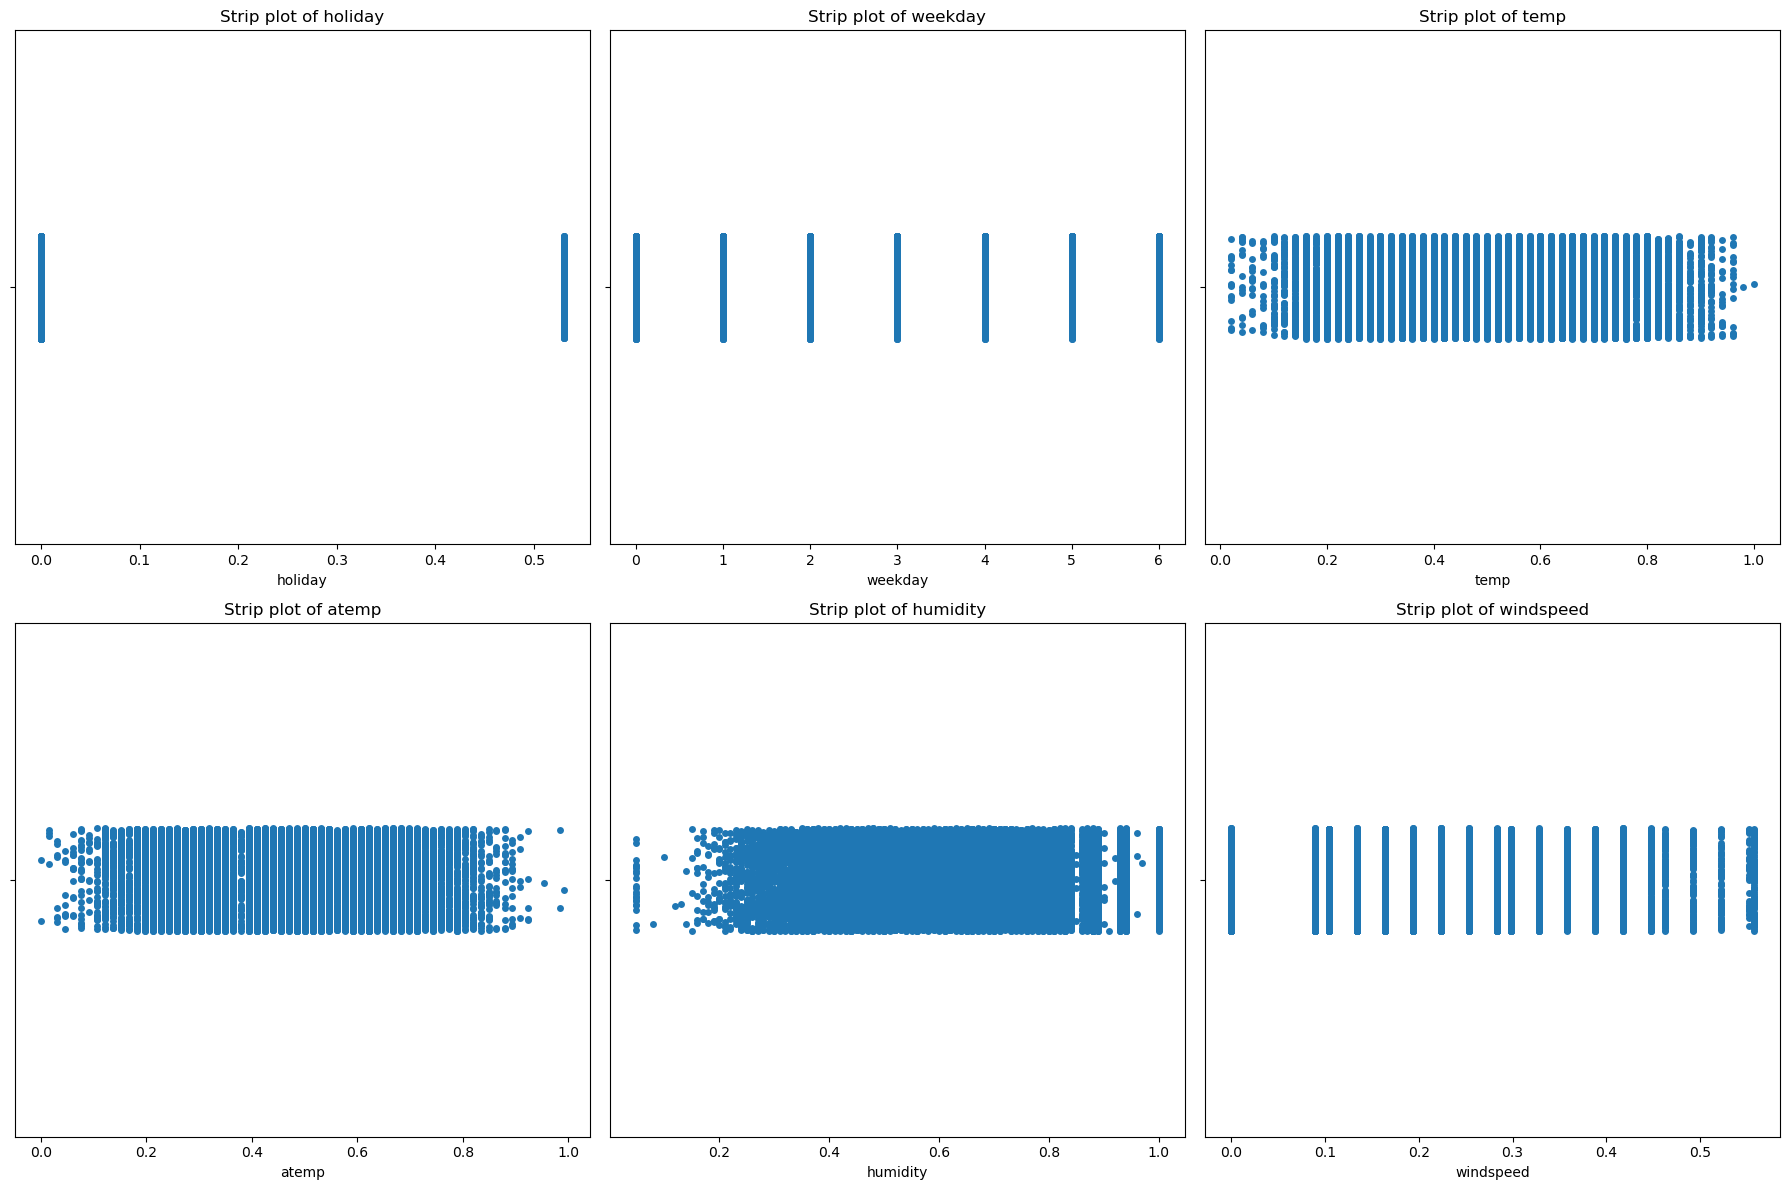

In [124]:
symmetric_features = ['holiday', 'weekday', 'temp', 'atemp', 'humidity', 'windspeed']

# Set up the figure and axes for a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, feature in enumerate(symmetric_features):
    sns.stripplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Strip plot of {feature}')
    
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [125]:
# List of non-symmetric features
skew_symmetric_features = ['season', 'year', 'month', 'hour', 'workingday', 'weather', 'casual', 'registered', 'count']

# Apply outlier treatment to each non-symmetric feature
for feature in skew_symmetric_features:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_boundary = df[feature].quantile(0.25) - 1.5 * IQR
    upper_boundary = df[feature].quantile(0.75) + 1.5 * IQR
    
    # Replace values below the lower boundary with the lower boundary value
    df.loc[df[feature] < lower_boundary, feature] = lower_boundary
    
    # Replace values above the upper boundary with the upper boundary value
    df.loc[df[feature] > upper_boundary, feature] = upper_boundary

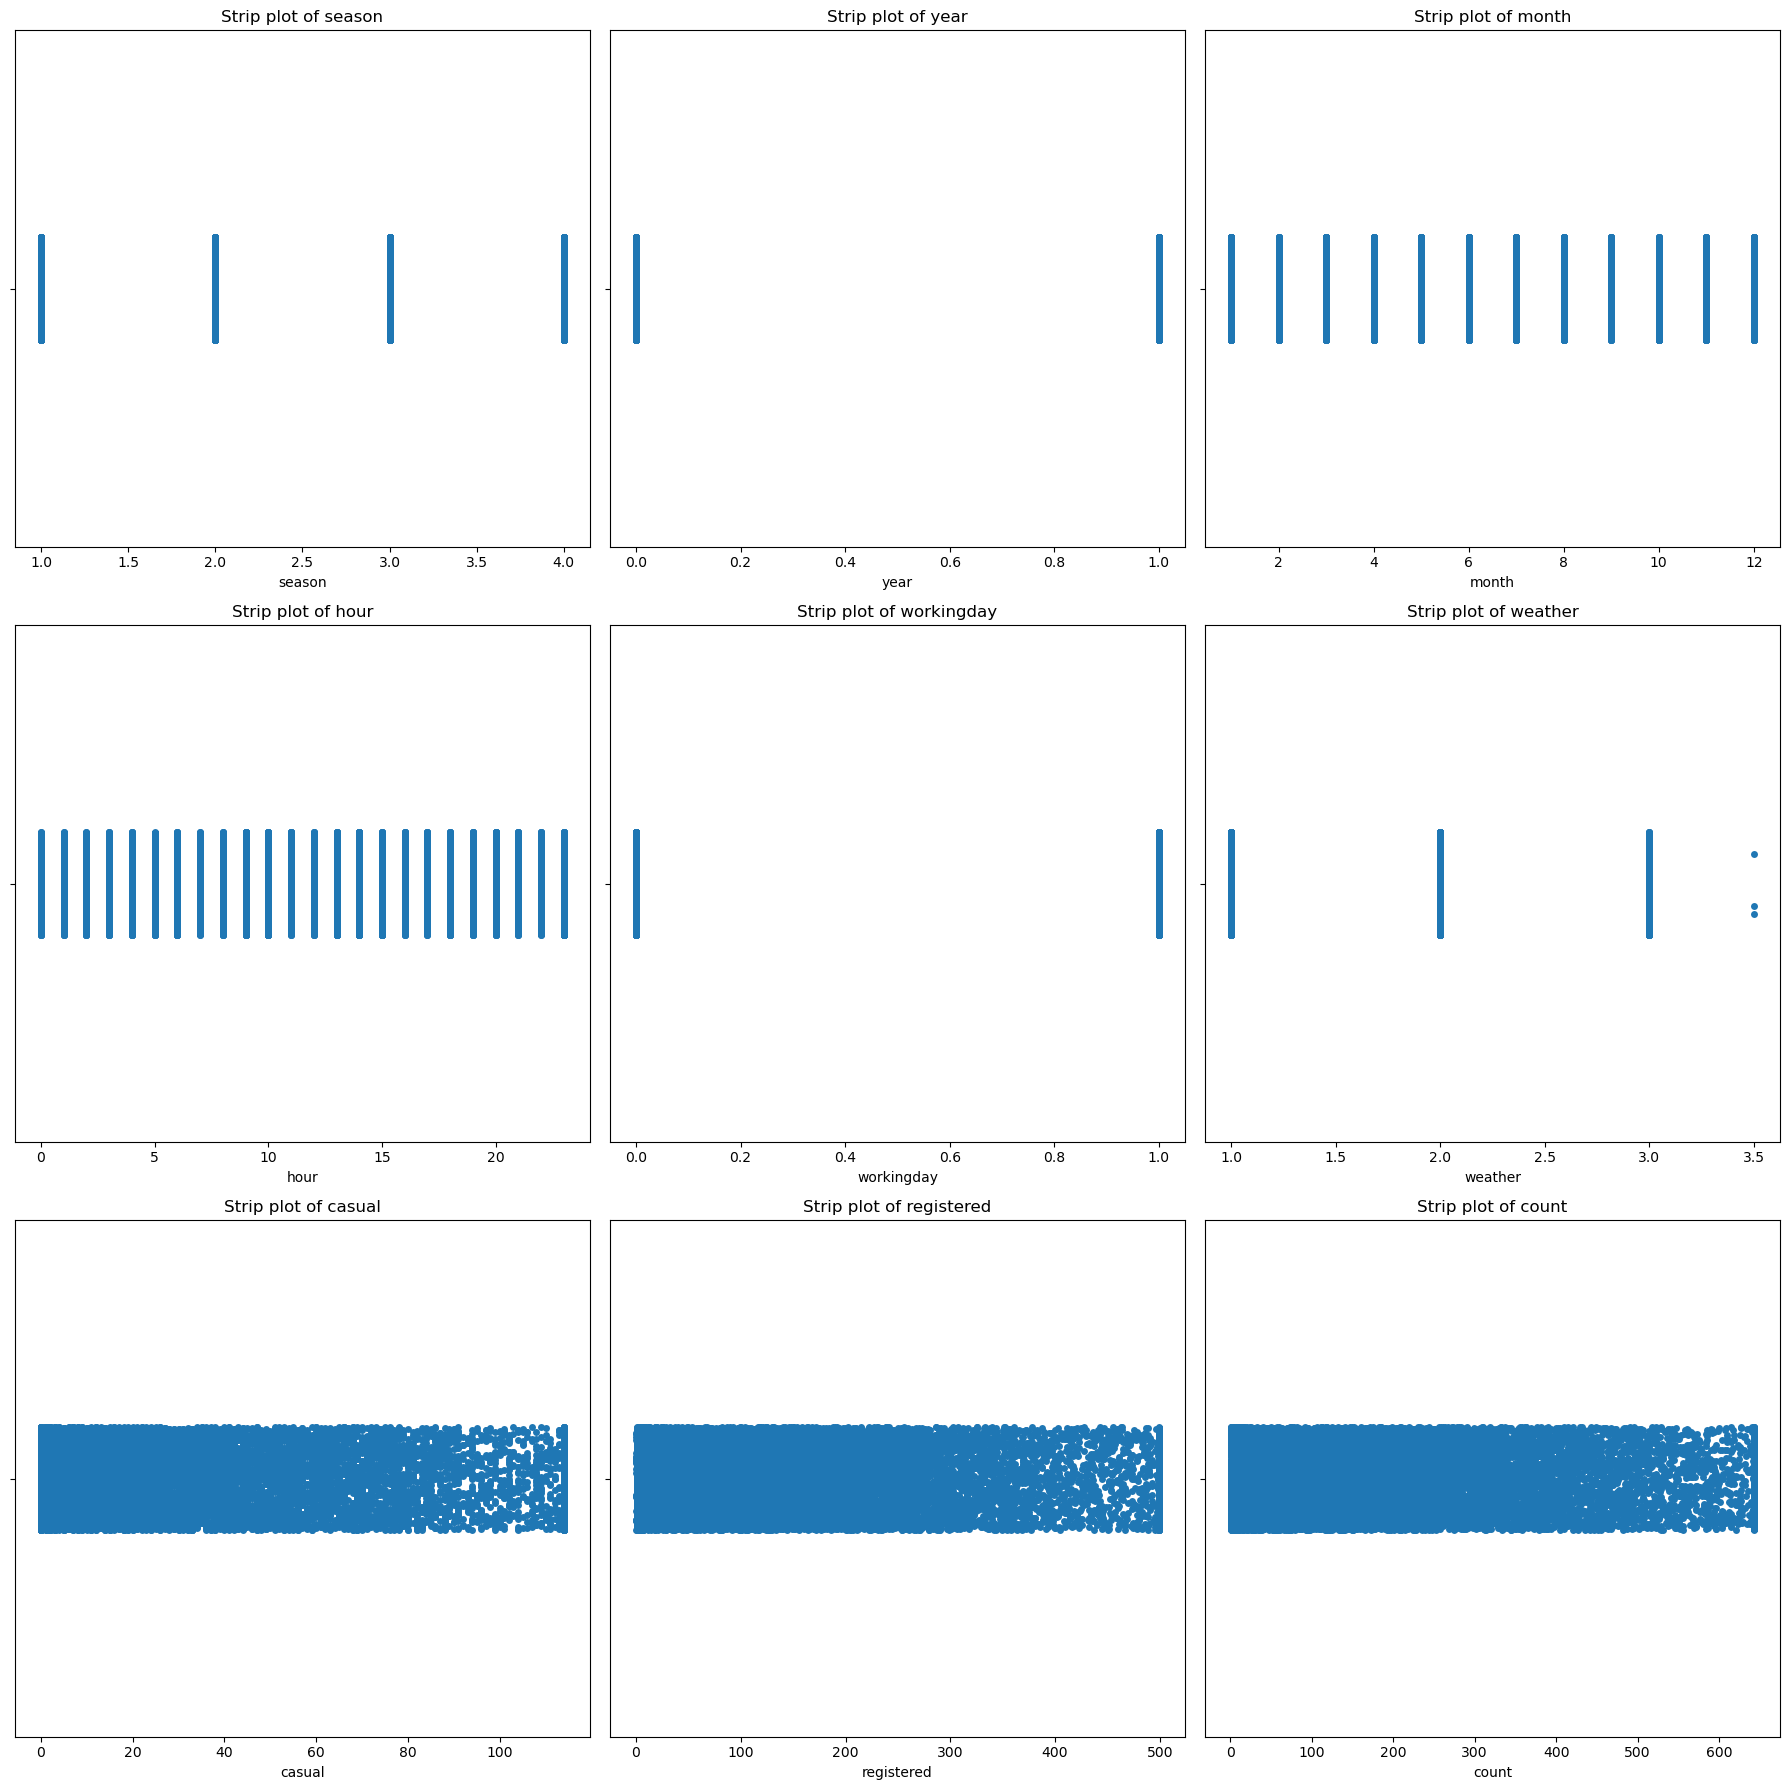

In [126]:
# Set up the figure and axes for a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, feature in enumerate(skew_symmetric_features):
    sns.stripplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Strip plot of {feature}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

**Observation**
<li>Identifying which columns in a dataset have a symmetric distribution can be useful because it can give you insight into the overall shape of the distribution of values in each column
<li> On the other hand, if a column has a non-symmetric distribution, it may be more likely to be skewed in one direction or the other, which could affect the validity of certain statistical tests or the performance of certain machine learning models.
<li> I separated the skew symmetric and symmetric features and define the upper and lower boundry as defined below. .
<li>Then, used capping method to change outliers into upper and lower limit instead of trimming.